In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib

file_duration = pd.DataFrame(columns = ['Tstart','Tend', 'Istart','Iend'])


In [3]:
file_duration

,Tstart,Tend,Istart,Iend


In [4]:
file_duration.shape

(0, 4)

In [5]:
file_duration.at[0,'Tstart']= 1


In [8]:
file_duration

,Tstart,Tend,Istart,Iend


In [22]:
PATHS = ["/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/*.dat",
         "/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/*.dat",
         "/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2020/CR3000/Sec/*.dat",
         "/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2021/CR3000/Sec/*.dat"]

file_duration = pd.DataFrame(columns = ['Tstart','Tend', 'Istart','Iend'])
column_names = ['RECORD',
                'TIMESTAMP',
                'GHIP_SI02pt100',
                'GHIP_SMP11',
                'GHIP_SMP22',
                'GHIP_SPN1',
                'GHIT_SMP22',
                'TGHIP_SI02pt100', 
                'TGHIP_SI02pt100_dirty',
                'TGIP_SMP11_VENT',
                'DfHIP_SPN1', 
                'DfHIRP_SMP11',
                'DfHIT_SMP22',
                'DIF_GLO_REF_SPN1',
                'DNI_SHP1',
                'LW_SGR4', 
                'wind_speed', 
                'wind_direction']
datafiles = []

for path in PATHS:
    datafiles = glob.glob(path)
    datafiles.sort()
    for file in datafiles:
        df = pd.read_csv(file, usecols=column_names)[column_names]        

        df[['GHIP_SI02pt100','GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22',
         'TGHIP_SI02pt100','TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT',
         'DfHIP_SPN1','DfHIRP_SMP11','DfHIT_SMP22','DIF_GLO_REF_SPN1',
         'DNI_SHP1','LW_SGR4', 'wind_speed','wind_direction']] = df[['GHIP_SI02pt100',
         'GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22','TGHIP_SI02pt100',
         'TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT','DfHIP_SPN1','DfHIRP_SMP11',
         'DfHIT_SMP22','DIF_GLO_REF_SPN1','DNI_SHP1','LW_SGR4', 'wind_speed',
         'wind_direction']].astype("float64")  
    
        df['TIMESTAMP'] = df['TIMESTAMP'].astype(np.datetime64)
                 
        df = df.fillna(-9999)

        df = df.sort_values(by=['TIMESTAMP'])


        # PARA CADA ARQUIVO CHECAR: TIMESTAMP INICIO / FIM
        file_duration.at[file,'Tstart']= df.iloc[0,0]
        file_duration.at[file,'Tend'  ]= df.iloc[-1,0]    
        file_duration.at[file,'Istart']= df.iloc[0,1]
        file_duration.at[file,'Iend'  ]= df.iloc[-1,1]    


In [23]:
file_duration

,Tstart,Tend,Istart,Iend
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_1.dat,506255,157695,2017-12-13 14:32:40,2018-01-18 12:30:02
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_2.dat,80247,597515,2018-01-17 14:58:22,2018-01-23 15:46:21
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_3.dat,0,3184167,2018-01-23 15:50:02,2018-03-01 19:00:05
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_4.dat,0,5197349,2018-01-23 15:50:02,2018-08-31 23:50:00
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_5.dat,5197350,194794,2018-08-31 23:50:01,2018-09-30 23:50:00
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_6.dat,194795,97849,2018-09-30 23:50:01,2018-10-31 23:49:59
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_7.dat,97850,2922104,2018-10-31 23:50:00,2018-12-03 18:10:00
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_8.dat,2922105,5337777,2018-12-03 18:10:01,2018-12-31 17:20:04
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/SAPIENS_CR3000_Second_01.dat,5530912,8039001,2019-01-02 22:58:59,2019-01-31 23:49:59
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/SAPIENS_CR3000_Second_02.dat,8039002,8456196,2019-01-31 23:50:00,2019-02-18 16:59:59


In [14]:
PATHS

['/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/*.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2019/CR3000/Sec/*.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2020/CR3000/Sec/*.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2021/CR3000/Sec/*.dat']

In [18]:
path = PATHS[0]

In [19]:
path

'/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/*.dat'

In [25]:
    datafiles = glob.glob(PATHS[0])
    datafiles.sort()


In [24]:
PATHS[0]

'/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/*.dat'

In [26]:
datafiles

['/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_1.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_2.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_3.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_4.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_5.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_6.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_7.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_8.dat']

In [27]:
df = pd.read_csv(datafiles[0], usecols=column_names)[column_names]        
df[['GHIP_SI02pt100','GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22',
         'TGHIP_SI02pt100','TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT',
         'DfHIP_SPN1','DfHIRP_SMP11','DfHIT_SMP22','DIF_GLO_REF_SPN1',
         'DNI_SHP1','LW_SGR4', 'wind_speed','wind_direction']] = df[['GHIP_SI02pt100',
         'GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22','TGHIP_SI02pt100',
         'TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT','DfHIP_SPN1','DfHIRP_SMP11',
         'DfHIT_SMP22','DIF_GLO_REF_SPN1','DNI_SHP1','LW_SGR4', 'wind_speed',
         'wind_direction']].astype("float64")  
df['TIMESTAMP'] = df['TIMESTAMP'].astype(np.datetime64)
df = df.fillna(-9999)
df = df.sort_values(by=['TIMESTAMP'])


/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
df

,RECORD,TIMESTAMP,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
0,506255,2017-12-13 14:32:40,1019.0,1028.0,1047.0,1012.0,1028.0,907.0,910.0,973.0,637.6,617.0,767.0,7.071,240.1,404.5,1.14,35.0
1,506256,2017-12-13 14:32:41,1023.0,1037.0,1045.0,1008.0,1045.0,906.0,917.0,994.0,639.6,617.0,766.5,15.670,252.8,404.7,1.30,51.0
2,506257,2017-12-13 14:32:42,1073.0,1090.0,1086.0,1062.0,1095.0,950.0,967.0,1047.0,639.6,616.0,766.1,11.380,307.6,404.8,1.18,98.0
3,506258,2017-12-13 14:32:43,1131.0,1159.0,1146.0,1132.0,1160.0,1005.0,1027.0,1124.0,640.7,616.0,765.7,-0.830,378.0,404.9,0.96,285.0
4,506259,2017-12-13 14:32:44,1236.0,1272.0,1248.0,1233.0,1260.0,1100.0,1131.0,1230.0,642.4,616.0,765.2,3.045,485.8,405.0,0.91,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382850,157691,2018-01-18 12:29:58,792.9,822.0,824.0,789.0,826.0,675.8,687.5,743.5,137.4,135.0,164.2,3.826,840.0,406.6,5.48,284.0
3382851,157692,2018-01-18 12:29:59,791.8,821.0,823.0,787.7,825.0,674.9,686.9,743.1,135.9,135.0,164.2,4.140,839.0,406.7,4.96,285.0
3382852,157693,2018-01-18 12:30:00,790.4,820.0,822.0,785.2,824.0,673.5,685.6,741.9,135.9,135.0,164.1,5.196,837.0,406.8,4.85,286.0
3382853,157694,2018-01-18 12:30:01,789.5,819.0,821.0,784.1,823.0,673.1,684.8,740.6,134.6,135.0,164.1,5.463,836.0,406.8,4.93,289.0


In [31]:
df= df.drop_duplicates()

In [30]:
dfdrop

,RECORD,TIMESTAMP,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
0,506255,2017-12-13 14:32:40,1019.0,1028.0,1047.0,1012.0,1028.0,907.0,910.0,973.0,637.6,617.0,767.0,7.071,240.1,404.5,1.14,35.0
1,506256,2017-12-13 14:32:41,1023.0,1037.0,1045.0,1008.0,1045.0,906.0,917.0,994.0,639.6,617.0,766.5,15.670,252.8,404.7,1.30,51.0
2,506257,2017-12-13 14:32:42,1073.0,1090.0,1086.0,1062.0,1095.0,950.0,967.0,1047.0,639.6,616.0,766.1,11.380,307.6,404.8,1.18,98.0
3,506258,2017-12-13 14:32:43,1131.0,1159.0,1146.0,1132.0,1160.0,1005.0,1027.0,1124.0,640.7,616.0,765.7,-0.830,378.0,404.9,0.96,285.0
4,506259,2017-12-13 14:32:44,1236.0,1272.0,1248.0,1233.0,1260.0,1100.0,1131.0,1230.0,642.4,616.0,765.2,3.045,485.8,405.0,0.91,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382850,157691,2018-01-18 12:29:58,792.9,822.0,824.0,789.0,826.0,675.8,687.5,743.5,137.4,135.0,164.2,3.826,840.0,406.6,5.48,284.0
3382851,157692,2018-01-18 12:29:59,791.8,821.0,823.0,787.7,825.0,674.9,686.9,743.1,135.9,135.0,164.2,4.140,839.0,406.7,4.96,285.0
3382852,157693,2018-01-18 12:30:00,790.4,820.0,822.0,785.2,824.0,673.5,685.6,741.9,135.9,135.0,164.1,5.196,837.0,406.8,4.85,286.0
3382853,157694,2018-01-18 12:30:01,789.5,819.0,821.0,784.1,823.0,673.1,684.8,740.6,134.6,135.0,164.1,5.463,836.0,406.8,4.93,289.0


In [32]:
df

,RECORD,TIMESTAMP,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
0,506255,2017-12-13 14:32:40,1019.0,1028.0,1047.0,1012.0,1028.0,907.0,910.0,973.0,637.6,617.0,767.0,7.071,240.1,404.5,1.14,35.0
1,506256,2017-12-13 14:32:41,1023.0,1037.0,1045.0,1008.0,1045.0,906.0,917.0,994.0,639.6,617.0,766.5,15.670,252.8,404.7,1.30,51.0
2,506257,2017-12-13 14:32:42,1073.0,1090.0,1086.0,1062.0,1095.0,950.0,967.0,1047.0,639.6,616.0,766.1,11.380,307.6,404.8,1.18,98.0
3,506258,2017-12-13 14:32:43,1131.0,1159.0,1146.0,1132.0,1160.0,1005.0,1027.0,1124.0,640.7,616.0,765.7,-0.830,378.0,404.9,0.96,285.0
4,506259,2017-12-13 14:32:44,1236.0,1272.0,1248.0,1233.0,1260.0,1100.0,1131.0,1230.0,642.4,616.0,765.2,3.045,485.8,405.0,0.91,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382850,157691,2018-01-18 12:29:58,792.9,822.0,824.0,789.0,826.0,675.8,687.5,743.5,137.4,135.0,164.2,3.826,840.0,406.6,5.48,284.0
3382851,157692,2018-01-18 12:29:59,791.8,821.0,823.0,787.7,825.0,674.9,686.9,743.1,135.9,135.0,164.2,4.140,839.0,406.7,4.96,285.0
3382852,157693,2018-01-18 12:30:00,790.4,820.0,822.0,785.2,824.0,673.5,685.6,741.9,135.9,135.0,164.1,5.196,837.0,406.8,4.85,286.0
3382853,157694,2018-01-18 12:30:01,789.5,819.0,821.0,784.1,823.0,673.1,684.8,740.6,134.6,135.0,164.1,5.463,836.0,406.8,4.93,289.0


In [34]:
column_namesR = ['TIMESTAMP',
                'GHIP_SI02pt100',
                'GHIP_SMP11',
                'GHIP_SMP22',
                'GHIP_SPN1',
                'GHIT_SMP22',
                'TGHIP_SI02pt100', 
                'TGHIP_SI02pt100_dirty',
                'TGIP_SMP11_VENT',
                'DfHIP_SPN1', 
                'DfHIRP_SMP11',
                'DfHIT_SMP22',
                'DIF_GLO_REF_SPN1',
                'DNI_SHP1',
                'LW_SGR4', 
                'wind_speed', 
                'wind_direction']

In [35]:
df = pd.read_csv(datafiles[0], usecols=column_namesR)[column_namesR]        
df[['GHIP_SI02pt100','GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22',
         'TGHIP_SI02pt100','TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT',
         'DfHIP_SPN1','DfHIRP_SMP11','DfHIT_SMP22','DIF_GLO_REF_SPN1',
         'DNI_SHP1','LW_SGR4', 'wind_speed','wind_direction']] = df[['GHIP_SI02pt100',
         'GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22','TGHIP_SI02pt100',
         'TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT','DfHIP_SPN1','DfHIRP_SMP11',
         'DfHIT_SMP22','DIF_GLO_REF_SPN1','DNI_SHP1','LW_SGR4', 'wind_speed',
         'wind_direction']].astype("float64")  
df['TIMESTAMP'] = df['TIMESTAMP'].astype(np.datetime64)
df = df.fillna(-9999)
df = df.sort_values(by=['TIMESTAMP'])

/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
df

,TIMESTAMP,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
0,2017-12-13 14:32:40,1019.0,1028.0,1047.0,1012.0,1028.0,907.0,910.0,973.0,637.6,617.0,767.0,7.071,240.1,404.5,1.14,35.0
1,2017-12-13 14:32:41,1023.0,1037.0,1045.0,1008.0,1045.0,906.0,917.0,994.0,639.6,617.0,766.5,15.670,252.8,404.7,1.30,51.0
2,2017-12-13 14:32:42,1073.0,1090.0,1086.0,1062.0,1095.0,950.0,967.0,1047.0,639.6,616.0,766.1,11.380,307.6,404.8,1.18,98.0
3,2017-12-13 14:32:43,1131.0,1159.0,1146.0,1132.0,1160.0,1005.0,1027.0,1124.0,640.7,616.0,765.7,-0.830,378.0,404.9,0.96,285.0
4,2017-12-13 14:32:44,1236.0,1272.0,1248.0,1233.0,1260.0,1100.0,1131.0,1230.0,642.4,616.0,765.2,3.045,485.8,405.0,0.91,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382850,2018-01-18 12:29:58,792.9,822.0,824.0,789.0,826.0,675.8,687.5,743.5,137.4,135.0,164.2,3.826,840.0,406.6,5.48,284.0
3382851,2018-01-18 12:29:59,791.8,821.0,823.0,787.7,825.0,674.9,686.9,743.1,135.9,135.0,164.2,4.140,839.0,406.7,4.96,285.0
3382852,2018-01-18 12:30:00,790.4,820.0,822.0,785.2,824.0,673.5,685.6,741.9,135.9,135.0,164.1,5.196,837.0,406.8,4.85,286.0
3382853,2018-01-18 12:30:01,789.5,819.0,821.0,784.1,823.0,673.1,684.8,740.6,134.6,135.0,164.1,5.463,836.0,406.8,4.93,289.0


In [37]:
df= df.drop_duplicates()

In [38]:
df

,TIMESTAMP,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
0,2017-12-13 14:32:40,1019.0,1028.0,1047.0,1012.0,1028.0,907.0,910.0,973.0,637.6,617.0,767.0,7.071,240.1,404.5,1.14,35.0
1,2017-12-13 14:32:41,1023.0,1037.0,1045.0,1008.0,1045.0,906.0,917.0,994.0,639.6,617.0,766.5,15.670,252.8,404.7,1.30,51.0
2,2017-12-13 14:32:42,1073.0,1090.0,1086.0,1062.0,1095.0,950.0,967.0,1047.0,639.6,616.0,766.1,11.380,307.6,404.8,1.18,98.0
3,2017-12-13 14:32:43,1131.0,1159.0,1146.0,1132.0,1160.0,1005.0,1027.0,1124.0,640.7,616.0,765.7,-0.830,378.0,404.9,0.96,285.0
4,2017-12-13 14:32:44,1236.0,1272.0,1248.0,1233.0,1260.0,1100.0,1131.0,1230.0,642.4,616.0,765.2,3.045,485.8,405.0,0.91,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382850,2018-01-18 12:29:58,792.9,822.0,824.0,789.0,826.0,675.8,687.5,743.5,137.4,135.0,164.2,3.826,840.0,406.6,5.48,284.0
3382851,2018-01-18 12:29:59,791.8,821.0,823.0,787.7,825.0,674.9,686.9,743.1,135.9,135.0,164.2,4.140,839.0,406.7,4.96,285.0
3382852,2018-01-18 12:30:00,790.4,820.0,822.0,785.2,824.0,673.5,685.6,741.9,135.9,135.0,164.1,5.196,837.0,406.8,4.85,286.0
3382853,2018-01-18 12:30:01,789.5,819.0,821.0,784.1,823.0,673.1,684.8,740.6,134.6,135.0,164.1,5.463,836.0,406.8,4.93,289.0


In [109]:
naive_times = pd.date_range(start='2017-12-13 14:32:40', end='21-01-2021  14:25:08', freq='1s')

In [110]:
naive_times.shape

(98063549,)

In [44]:
import datetime

In [49]:
delta= df['TIMESTAMP'].shift(-1) - df['TIMESTAMP']

In [50]:
delta.shape

(3069671,)

In [52]:
df['delta'] = delta

<ipython-input-52-d827a0f7dc06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta'] = delta


In [58]:
df[df['TIMESTAMP'].diff().gt('1Sec')]

,TIMESTAMP,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction,deltat,delta
81430,2017-12-13 15:25:08,877.00,913.0,920.0,887.00,888.0,774.90,776.90,854.0,602.40,575.0,727.6,-9.870,143.4,402.4,5.71,319.0,0 days 00:00:01,0 days 00:00:01
104038,2017-12-13 21:41:57,20.07,17.7,20.8,22.95,20.4,17.86,18.06,17.4,22.12,16.0,20.1,-2.880,-2.1,371.9,5.48,329.0,0 days 00:00:01,0 days 00:00:01
25949,2017-12-13 21:45:12,14.86,12.1,15.2,17.50,14.8,13.72,13.87,12.6,17.17,11.0,14.6,-2.641,-2.1,373.1,3.03,344.0,0 days 00:00:01,0 days 00:00:01
182384,2017-12-13 21:48:01,15.27,12.4,15.5,17.34,15.1,13.25,13.39,12.3,16.18,12.0,14.8,-2.062,-2.1,373.1,3.79,340.0,0 days 00:00:01,0 days 00:00:01
78101,2017-12-14 12:14:30,279.70,890.0,887.0,341.90,892.0,2301.00,1598.00,777.0,-369.70,189.0,181.5,-62.220,857.0,375.1,-9999.00,-9999.0,0 days 00:00:01,0 days 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300807,2018-01-18 11:22:27,579.60,607.0,610.2,583.00,610.9,433.00,445.30,509.8,161.10,140.0,165.0,-3.361,761.5,405.5,3.73,303.0,0 days 00:00:01,0 days 00:00:01
3301525,2018-01-18 11:34:26,551.60,580.4,588.3,568.90,580.6,431.30,441.30,498.6,169.20,59.0,181.3,-17.390,637.4,404.4,4.32,296.0,0 days 00:00:01,0 days 00:00:01
3382626,2018-01-18 12:25:58,747.50,774.2,776.8,746.20,779.6,634.60,645.80,700.0,129.60,130.0,159.5,1.233,796.3,406.7,3.86,295.0,0 days 00:00:01,0 days 00:00:01
3382657,2018-01-18 12:26:30,751.10,779.0,780.9,751.00,783.8,638.30,649.70,703.5,135.50,131.0,160.8,0.116,798.7,406.1,2.96,289.0,0 days 00:00:01,0 days 00:00:01


In [69]:
gap = df[df['delta'].gt('1Sec')]

In [71]:
g = gap['delta']

In [72]:
g

3146      0 days 00:00:02
182021    0 days 00:00:02
25948     0 days 00:00:02
26116     0 days 00:00:02
234367    0 days 00:00:06
                ...      
3300806   0 days 00:00:02
3379534   0 days 00:00:02
3382625   0 days 00:00:02
3382656   0 days 00:00:02
3382676   0 days 00:00:16
Name: delta, Length: 5909, dtype: timedelta64[ns]

In [79]:
df['delta']

0         0 days 00:00:01
1         0 days 00:00:01
2         0 days 00:00:01
3         0 days 00:00:01
4         0 days 00:00:01
                ...      
3382850   0 days 00:00:01
3382851   0 days 00:00:01
3382852   0 days 00:00:01
3382853   0 days 00:00:01
3382854               NaT
Name: delta, Length: 3069671, dtype: timedelta64[ns]

In [84]:
gap['delta'].describe()

count                         5909
mean     0 days 00:00:06.647656117
std      0 days 00:04:28.062800982
min                0 days 00:00:02
25%                0 days 00:00:02
50%                0 days 00:00:02
75%                0 days 00:00:02
max                0 days 05:43:25
Name: delta, dtype: object

In [92]:
gapS = gap['delta'].dt.total_seconds()

In [94]:
gapS

3146        2.0
182021      2.0
25948       2.0
26116       2.0
234367      6.0
           ... 
3300806     2.0
3379534     2.0
3382625     2.0
3382656     2.0
3382676    16.0
Name: delta, Length: 5909, dtype: float64

In [95]:
gapS.describe()

count     5909.000000
mean         6.647656
std        268.062801
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max      20605.000000
Name: delta, dtype: float64

<AxesSubplot:ylabel='Frequency'>

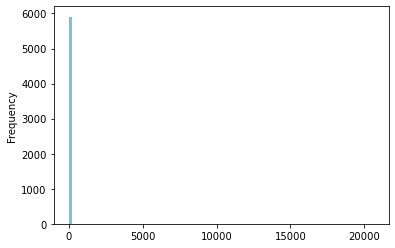

In [100]:
gapS.plot.hist(bins = 100, alpha=0.5)

In [104]:
gapS.plot.scatter(y=gapS, x )

TypeError: scatter() missing 1 required positional argument: 'x'

In [107]:
gapS = gapS.reset_index

In [108]:
gapS

<bound method Series.reset_index of 3146        2.0
182021      2.0
25948       2.0
26116       2.0
234367      6.0
           ... 
3300806     2.0
3379534     2.0
3382625     2.0
3382656     2.0
3382676    16.0
Name: delta, Length: 5909, dtype: float64>

In [65]:
df.iloc[81430]

TIMESTAMP                2017-12-14 20:29:15
GHIP_SI02pt100                         211.2
GHIP_SMP11                             226.7
GHIP_SMP22                             230.1
GHIP_SPN1                              18.16
GHIT_SMP22                             227.0
TGHIP_SI02pt100                        137.4
TGHIP_SI02pt100_dirty                  137.2
TGIP_SMP11_VENT                        187.5
DfHIP_SPN1                             0.495
DfHIRP_SMP11                           132.0
DfHIT_SMP22                            158.6
DIF_GLO_REF_SPN1                       193.0
DNI_SHP1                               200.2
LW_SGR4                                387.1
wind_speed                              1.61
wind_direction                         250.0
deltat                       0 days 00:00:01
delta                        0 days 00:00:01
Name: 237697, dtype: object

In [ ]:
naive_times = pd.date_range(start='2017-12-13 14:32:40', end='2018-01-18 12:30:02', freq='1s')